In [1]:
import numpy
import pandas
from matplotlib import pyplot

from data.dataimport import import_data
import data.tree
from encoders.baseencoder import AbstractEncoder
from data.tree import Node

In [2]:
ENCODER_PKL = "../rnnsupervisedencoder-boolean5.pkl"
VALIDATION_DATA = "../expressions-synthetic/split/boolean5-validationset.json.gz"
DATA = VALIDATION_DATA

In [3]:
encoder = AbstractEncoder.load(ENCODER_PKL)

In [4]:
data = import_data(DATA)

In [5]:
def flatten_data(data):
    flat = []
    for key, class_ in data.items():
        for item in [class_['original']] + class_['noise']:
            flat.append({
                'eq_class': key,
                'expression': item
            })
    return flat
    
flat = flatten_data(data)

In [6]:
def set_encoding(encoder, flat):
    for item in flat:
        item['encoding'] = encoder.get_encoding(item['expression'])

set_encoding(encoder, flat)

Compiling Methods...
Compilation Finished...


In [7]:
def get_false():
    false = Node("Start", ("child",), "False")
    and_ = Node("And", ("left", "right"), "False", parent=false)
    false.set_children_for_property("child", [and_])
    a = Node("a", (), "a", parent=and_)
    and_.set_children_for_property("right", [a])
    not_a = Node("Not", ("child",), "~b", parent=and_)
    a2 = Node("a", (), "a", parent=not_a)
    not_a.set_children_for_property("child", [a])
    and_.set_children_for_property("left", [not_a])
    return '(~a)&a', false

get_false()

('(~a)&a', <data.tree.Node at 0x11b202c88>)

In [8]:
false_encoding = encoder.get_encoding(get_false())
false_encoding

array([-0.08155994,  0.02444625,  0.11189315, -0.06636729,  0.10608516,
       -0.01508814, -0.13924403, -0.01154754, -0.06453023, -0.09473824,
       -0.04973381, -0.09933472,  0.23543637, -0.11139489, -0.01023852,
       -0.11580782,  0.0837387 ,  0.11850489, -0.03984906, -0.09069663,
       -0.01186382,  0.21279353,  0.08200047,  0.1993013 , -0.15533718,
        0.24675323, -0.27265456,  0.07601252, -0.05239825,  0.2307305 ,
       -0.00742987,  0.18483455,  0.03440192,  0.00856098, -0.03664961,
       -0.1933223 , -0.20811802, -0.09621128, -0.13952231,  0.03156438,
       -0.06018052, -0.07320988,  0.05443171, -0.09665047,  0.06752008,
       -0.20868826,  0.01286576,  0.2189243 ,  0.10913776,  0.1176682 ,
       -0.22587107,  0.15287991, -0.18964668,  0.01534232, -0.04952658,
       -0.12254066, -0.13966146, -0.04657979, -0.02595985, -0.04015511,
       -0.00902071, -0.08552259,  0.10480874, -0.18237273], dtype=float32)

In [9]:
def set_dist_to_false(false_encoding, flat):
    def dist(x,y):   
        return numpy.sqrt(numpy.sum((x-y)**2))
    
    for item in flat:
        item['dist'] = dist(item['encoding'], false_encoding)
set_dist_to_false(false_encoding, flat)

In [10]:
def make_table(flat):
    return [{'eq_class': item['eq_class'],
             'expression': item['expression'][0],
             'dist': item['dist']} for item in flat]
table = make_table(flat)

In [11]:
pandas.set_option('max_rows', 200)
df = pandas.DataFrame(table)
df

,dist,eq_class,expression
0,1.358142,True,"[(, c, ^, c, ), >>, a]"
1,1.461469,True,"[(, b, &, a, ), >>, b]"
2,1.381810,True,"[b, >>, (, b, &, b, )]"
3,1.424589,True,"[b, >>, (, c, >>, b, )]"
4,1.451349,True,"[a, >>, (, c, >>, c, )]"
5,1.422243,True,"[(, ~, a, ), >>, (, ~, a, )]"
6,1.449680,True,"[b, |, (, b, >>, a, )]"
7,1.405260,True,"[(, b, >>, b, ), |, c]"
8,1.383301,True,"[c, |, (, c, >>, c, )]"
9,1.391994,True,"[b, >>, (, ~, (, ~, b, ), )]"


In [12]:
@numpy.vectorize
def bucketise(num):
    BUCKET_NUM = 20
    return numpy.floor(num / 2 * BUCKET_NUM)

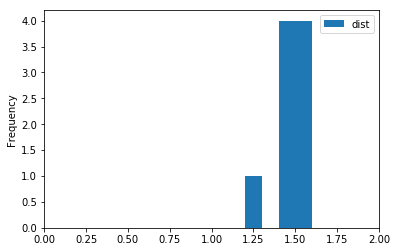

In [13]:
df[df.eq_class == 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))

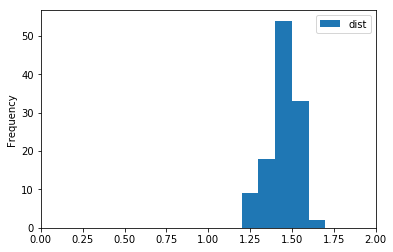

In [14]:
df[df.eq_class != 'False'].plot.hist(xlim=(0, 2), bins=numpy.linspace(0, 2, 21))